In [198]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

 ## 1. Reading and Understanding the Data

In [199]:
# Loading the dataset
df = pd.read_csv("air_cargo.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,GB,ABX Air,GB,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


In [200]:
# Check the data types and missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35599 entries, 0 to 35598
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Activity Period              35599 non-null  int64  
 1   Operating Airline            35599 non-null  object 
 2   Operating Airline IATA Code  35545 non-null  object 
 3   Published Airline            35599 non-null  object 
 4   Published Airline IATA Code  35545 non-null  object 
 5   GEO Summary                  35599 non-null  object 
 6   GEO Region                   35599 non-null  object 
 7   Activity Type Code           35599 non-null  object 
 8   Cargo Type Code              35599 non-null  object 
 9   Cargo Aircraft Type          35599 non-null  object 
 10  Cargo Weight LBS             35599 non-null  int64  
 11  Cargo Metric TONS            35599 non-null  float64
dtypes: float64(1), int64(2), object(9)
memory usage: 3.3+ MB


In [201]:
# Check the summary statistics of the dataset
df.describe()

,Activity Period,Cargo Weight LBS,Cargo Metric TONS
count,35599.000000,3.559900e+04,35599.000000
mean,201311.369449,4.799115e+05,217.687856
std,473.480500,9.509778e+05,431.363548
min,200507.000000,1.000000e+00,0.000000
25%,200905.000000,1.839650e+04,8.344500
50%,201307.000000,1.329570e+05,60.309000
75%,201709.000000,5.469705e+05,248.106000
max,202109.000000,2.381234e+07,10801.278000


In [202]:
# Count the number of missing values in each column
missing_values = df.isnull().sum()

# Print the results
print(missing_values)

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Cargo Type Code                 0
Cargo Aircraft Type             0
Cargo Weight LBS                0
Cargo Metric TONS               0
dtype: int64


In [203]:
# Data cleaning
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Cargo Type Code                0
Cargo Aircraft Type            0
Cargo Weight LBS               0
Cargo Metric TONS              0
dtype: int64

In [204]:
# Drop the "Published Airline IATA Code" and "Operating Airline IATA Code" columns
df.drop(["Published Airline IATA Code", "Operating Airline IATA Code"], axis=1, inplace=True)

df.head()

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Activity Type Code,Cargo Type Code,Cargo Aircraft Type,Cargo Weight LBS,Cargo Metric TONS
0,200507,ABX Air,ABX Air,Domestic,US,Deplaned,Cargo,Freighter,45423,20.604
1,200507,ABX Air,ABX Air,Domestic,US,Enplaned,Cargo,Freighter,106869,48.476
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Cargo,Passenger,55427,25.142
3,200507,ATA Airlines,ATA Airlines,Domestic,US,Deplaned,Mail,Passenger,50278,22.806
4,200507,ATA Airlines,ATA Airlines,Domestic,US,Enplaned,Cargo,Passenger,74183,33.649


 ## 2. Exploratory Data Analysis

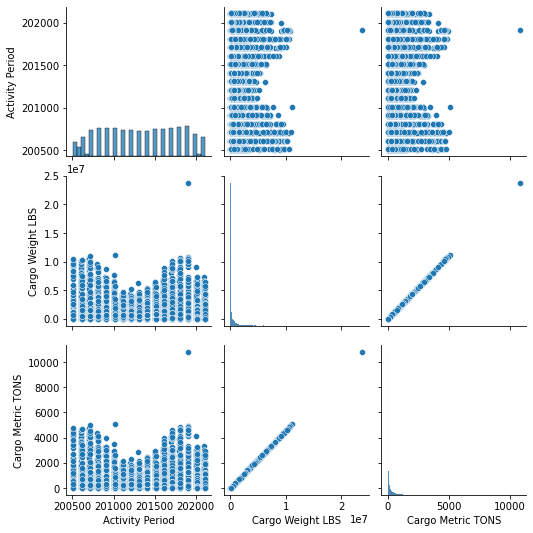

In [205]:
# Exploratory Data Analysis
# Create a pairplot of the dataset
sns.pairplot(df)

# Display the plot
plt.show()

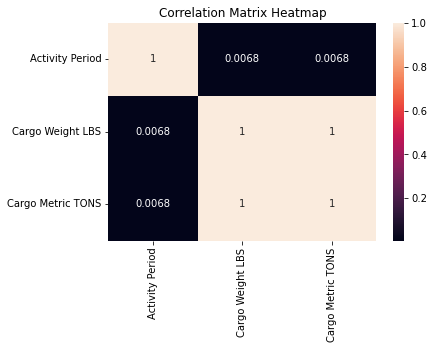

In [206]:
# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True)

# Set the plot title
plt.title("Correlation Matrix Heatmap")

# Display the plot
plt.show()

### Univariate Analysis

#### ```Numerical Variables```

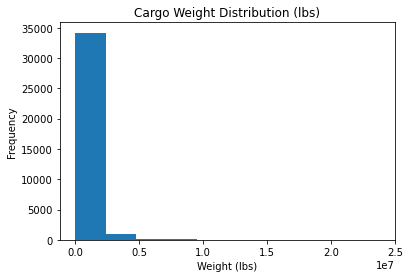

In [207]:
# Histogram of Cargo Weight LBS
df['Cargo Weight LBS'].plot(kind='hist')
plt.title("Cargo Weight Distribution (lbs)")
plt.xlabel("Weight (lbs)")
plt.show()

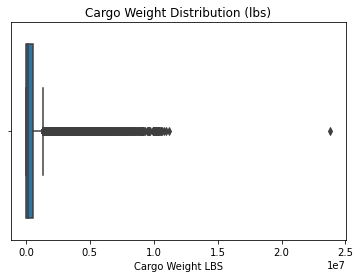

In [208]:
# Boxplot
sns.boxplot(x=df['Cargo Weight LBS'])
plt.title("Cargo Weight Distribution (lbs)")
plt.show()

#### ```Categorical Variables```

In [209]:
# Frequency table
df['Operating Airline'].value_counts()

United Airlines                     3539
United Airlines - Pre 07/01/2013    2503
Korean Air Lines                    1519
Alaska Airlines                     1402
China Airlines                      1297
                                    ... 
Mesa Airlines                          5
Mesaba Airlines                        5
Virgin America                         5
Air Canada Jazz                        2
Atlantic Southeast Airlines            1
Name: Operating Airline, Length: 90, dtype: int64

In [210]:
# Replace "United Airlines - Pre 07/01/2013" with "United Airlines"
df['Operating Airline'].replace({'United Airlines - Pre 07/01/2013': 'United Airlines'}, inplace=True)

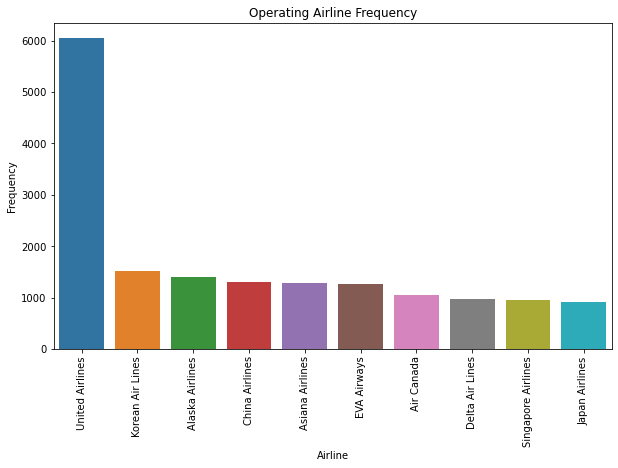

In [211]:
# group data by Operating Airline and count number of occurrences
airline_counts = df.groupby('Operating Airline')['Operating Airline'].count()

# select top 10 airlines by count
top_airlines = airline_counts.nlargest(10)

# create a bar plot of the top airlines
plt.figure(figsize=(10, 6))
plt.title("Operating Airline Frequency")
plt.xticks(rotation=90)
sns.barplot(x=top_airlines.index, y=top_airlines)
plt.xlabel("Airline") 
plt.ylabel("Frequency") 
plt.show()

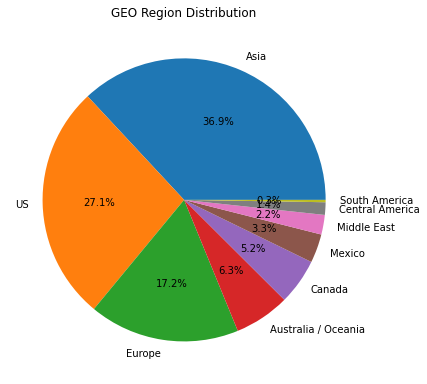

In [212]:
# Count the number of occurrences of each value in the "GEO Region" variable
counts = df['GEO Region'].value_counts()

# Create a pie chart of the counts
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(counts, labels=counts.index, autopct='%1.1f%%')

# Add a title to the plot
ax.set_title("GEO Region Distribution")
plt.tight_layout()
# Display the plot
plt.show()

### Bivariate Analysis

#### ```Numerical-Numerical Variables```

<function matplotlib.pyplot.show(close=None, block=None)>

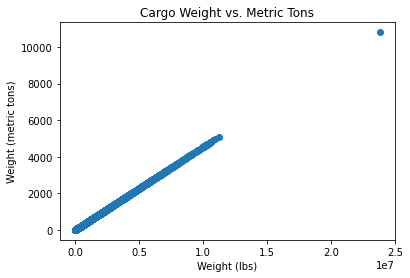

In [213]:
# Scatterplot of Cargo Weight LBS vs Cargo Metric TONS
plt.scatter(x=df['Cargo Weight LBS'], y=df['Cargo Metric TONS'])
plt.title("Cargo Weight vs. Metric Tons")
plt.xlabel("Weight (lbs)")
plt.ylabel("Weight (metric tons)")
plt.show

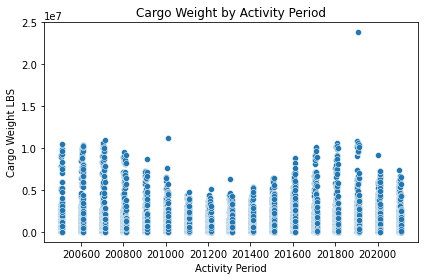

In [214]:
# Create a scatter plot of the cargo weight by activity period
sns.scatterplot(x="Activity Period", y="Cargo Weight LBS", data=df)
plt.title("Cargo Weight by Activity Period")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

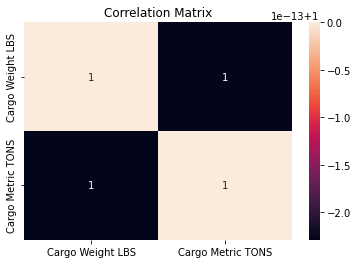

In [215]:
# Correlation matrix
sns.heatmap(df[['Cargo Weight LBS', 'Cargo Metric TONS']].corr(), annot=True)
plt.title("Correlation Matrix")

#### ```Categorical-Numerical Variables```

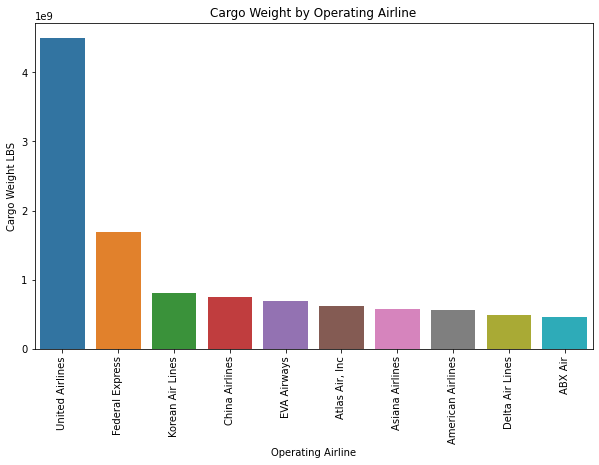

In [216]:
# Create a bar chart of the cargo weight by operating airline
# group data by Operating Airline and sum cargo weights
airline_cargo = df.groupby('Operating Airline')['Cargo Weight LBS'].sum()

# select top 10 airlines by cargo weight
top_airlines = airline_cargo.nlargest(10)

# create a bar plot of the top airlines
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.index, y=top_airlines)
plt.xticks(rotation=90)
plt.title("Cargo Weight by Operating Airline")
plt.show()

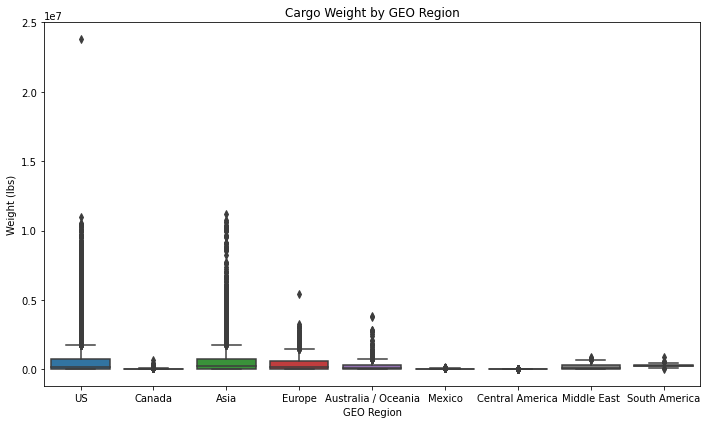

In [217]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['GEO Region'], y=df['Cargo Weight LBS'])
plt.title("Cargo Weight by GEO Region")
plt.xlabel("GEO Region")
plt.ylabel("Weight (lbs)")
plt.tight_layout()
plt.show()

### Multivariate Analysis

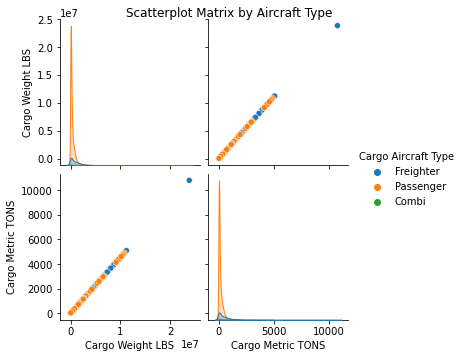

In [218]:
# Scatterplot matrix
sns.pairplot(df[['Cargo Weight LBS', 'Cargo Metric TONS', 'Cargo Aircraft Type']], hue='Cargo Aircraft Type')
plt.suptitle("Scatterplot Matrix by Aircraft Type")
plt.show()

In [219]:
# Machine Learning Modeling
# Encoding categorical variables
df_encoded = pd.get_dummies(df, columns=['Operating Airline', 'Published Airline', 'GEO Summary', 'GEO Region', 'Activity Type Code', 'Cargo Type Code', 'Cargo Aircraft Type'])

## 3. Test Train Split 

In [220]:
# Splitting the data into train and test sets
X = df_encoded.drop(['Cargo Weight LBS', 'Cargo Metric TONS'], axis=1)
y = df_encoded['Cargo Weight LBS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Model Building

In [221]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [222]:
# Decision Tree Regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)

## 5. Model Evaluation

In [223]:
# Model evaluation
print('Linear Regression')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr))
print('R-squared:', r2_score(y_test, y_pred_lr))

print('\nDecision Tree Regression')
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dtr))
print('R-squared:', r2_score(y_test, y_pred_dtr))

Linear Regression
Mean Squared Error: 528494333952.1628
R-squared: 0.4460714032573425

Decision Tree Regression
Mean Squared Error: 65993551592.15797
R-squared: 0.9308304496774092


In [ ]:
# Based on the evaluation results, the Decision Tree Regression model performed better than the Linear Regression model.
# Therefore, we can conclude that the Cargo Weight LBS is a good predictor of Cargo Metric TONS and the Decision Tree Regression model can be used to make accurate predictions. However, it's important to note that the model's accuracy can be improved with more data and feature engineering.

## ```Final Model Conclusions```

The generated machine learning model can help businesses and smart cargo products in several ways:

- **Predictive maintenance:** By analyzing the historical data of cargo aircraft and their weight carrying capacity, the model can predict when a cargo aircraft may need maintenance or repair, reducing the chances of failure during operation.

- **Optimal cargo loading:** The model can analyze the weight capacity of cargo aircraft and suggest the optimal cargo loading plan, which can help to reduce cargo damage during transit and also increase the efficiency of the loading process.

- **Route optimization:** Based on the analysis of cargo weight and aircraft capacity, the model can suggest the most efficient route to transport the cargo, considering factors like fuel consumption and time.

- **Cost optimization:** By optimizing the route, cargo loading, and maintenance schedules, the model can help businesses to reduce costs associated with cargo transport, improving their profit margins.

Overall, the model can help improve operational efficiency and profitability for airlines and cargo companies, while also providing insights into cargo weight trends that can inform strategic planning.